In [10]:
import json
import sqlite3
import numpy as np

from gameSimulation.jsonDeEncoders import decodingHooks

from datetime import datetime

from scipy import stats

# %config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mplTicker
import matplotlib.style as mplstyle
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

mplstyle.use('fast')
mplstyle.use('default')
# mpl.rcParams['figure.figsize'] = [20, 10]

colors = ["green", "blue", "red","orange","purple","yellow"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)






In [36]:
con = sqlite3.connect("G:/Uni/BA/data/gameHistories.db")
distinctSettings = con.execute(
    '''select gameSettingsID from gameSettings''').fetchall()
con.row_factory = lambda _, row: row[0]
roundCounts = [con.execute(
    '''select roundcount from game where gameSettingsID == (?)''',
    i).fetchall() for i in distinctSettings]
stepCounts = [con.execute(
    '''select stepcount from game where gameSettingsID == (?)''',
    i).fetchall() for i in distinctSettings]
winners = [[json.loads(r) for r in con.execute(
    '''select winners from game where gameSettingsID == (?)''',
    i).fetchall()] for i in distinctSettings]


con.close()


In [37]:
con = sqlite3.connect("G:/Uni/BA/data/gameHistories.db")
# labels = [json.loads(con.execute('''select dice from gameSettings where gameSettingsID == (?)''', i).fetchone()[0],object_hook=decodingHooks).getName() for i in distinctSettings]
labels = [" vs ".join([p.getStrategy().getName() for p in  json.loads(con.execute('''select players from gameSettings where gameSettingsID == (?)''', i).fetchone()[0],object_hook=decodingHooks)]) for i in distinctSettings]

con.close()
labels

['random vs random',
 'random vs MoveFirst',
 'random vs MoveLast',
 'random vs Score_DR+MD',
 'random vs Score_DR']

In [38]:

[sum(rc)/len(rc) for rc in roundCounts]



[70.795114, 52.921772, 77.820234, 54.276654, 51.86063]

In [39]:
[len(dt) for dt in winners]


[500000, 500000, 500000, 500000, 1000000]

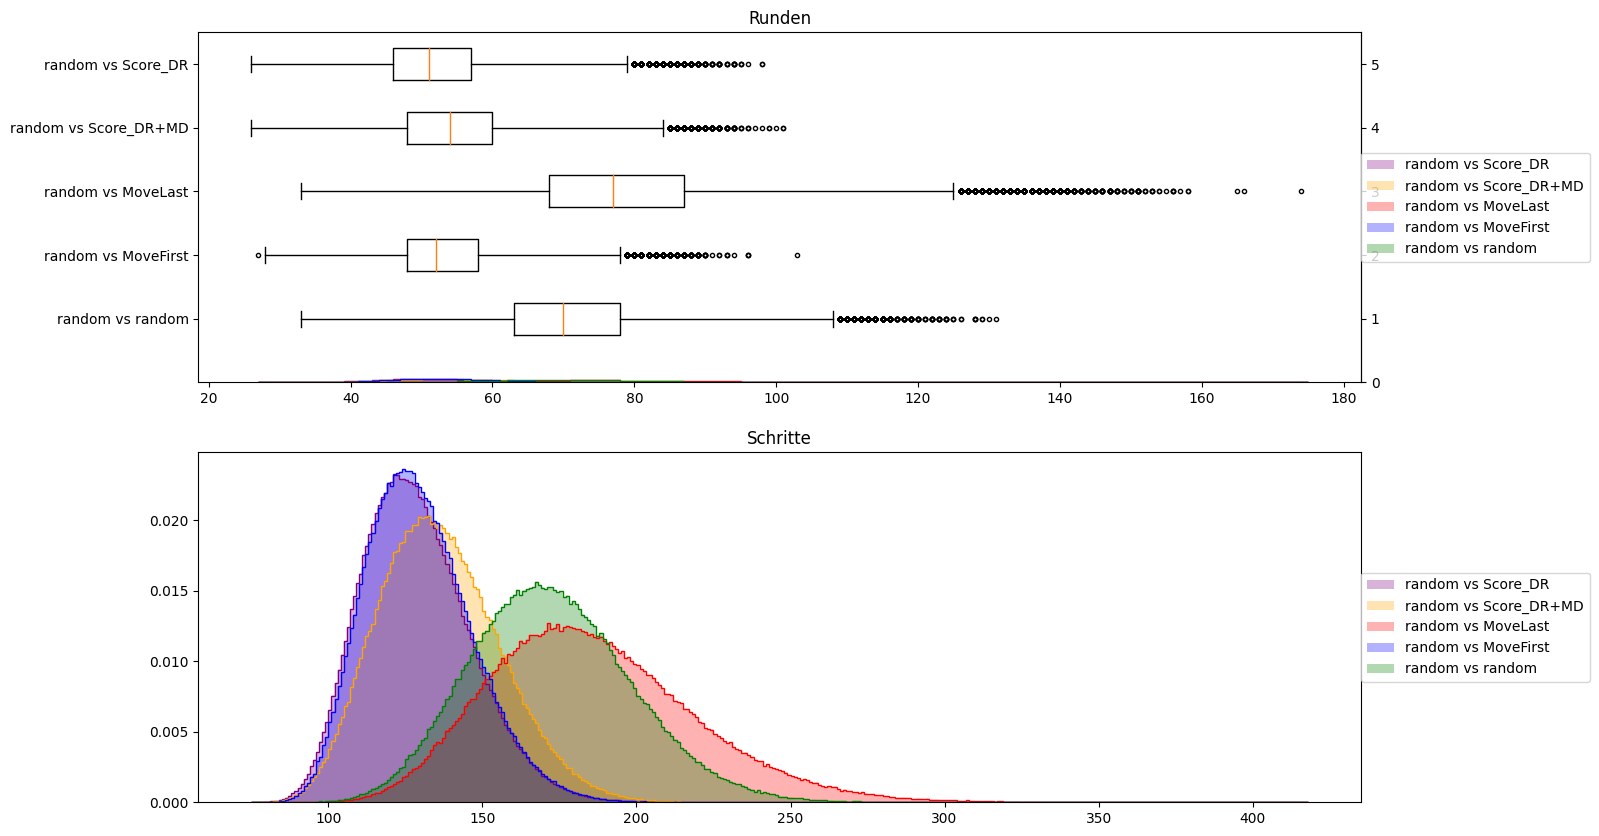

In [70]:
fig, ax = plt.subplot_mosaic([["Runden"], ["Schritte"]], figsize=[15, 10])

# for i,gl_stacked_ in enumerate(gl_stacked):
#         ax.bar([x for x, _ in gl_stacked_], [
#                 y for _, y in gl_stacked_], alpha=0.5, label=xlabels[i])
#         # ax.plot(gl[i], alpha=0.5)
ax["Runden"].set_title("Runden")
bins = range(min(min(roundCounts)), max(max(roundCounts))+2)
ax["Runden"].hist(roundCounts, color=colors[:len(roundCounts)], density=True, histtype="step",
           bins=bins)
ax["Runden"].hist(roundCounts, color=colors[:len(roundCounts)], label=labels, density=True, histtype="stepfilled",
           alpha=.3, bins=bins)
sec_ax = ax["Runden"].secondary_yaxis(location="right")
# ax["Runden"].boxplot(roundCounts, 0, ".", False, labels=labels,whis=1)
ax["Runden"].boxplot(roundCounts, 0, ".", False, labels=labels,whis=2)

ax["Schritte"].set_title("Schritte")
bins = range(min(min(stepCounts)), max(max(stepCounts))+2)
ax["Schritte"].hist(stepCounts, color=colors[:len(stepCounts)], density=True,  histtype="step",
           bins=bins)
ax["Schritte"].hist(stepCounts, color=colors[:len(stepCounts)], label=labels, density=True, histtype="stepfilled",
           alpha=.3, bins=bins)


for name in ax:
    if name not in labels:
        ax[name].legend(bbox_to_anchor=(1, .5),
                        loc='center left', borderaxespad=0.)


In [41]:
con = sqlite3.connect("G:/Uni/BA/data/gameHistoriesDice.db")
dicethrows_raw = [[item for sublist in [json.loads(dr) for dr in con.execute(
    '''select diceroll from game where gameSettingsID == (?)''', i).fetchall()]for item in sublist] for i in distinctSettings]

con.close()


TypeError: the JSON object must be str, bytes or bytearray, not tuple

In [ ]:
dicethrows = dicethrows_raw 
[[dt.count(x) for x in range(0,5)]  for dt in dicethrows]
(sum([len(dt) for dt in winners]),sum([len(dt) for dt in dicethrows]))

In [ ]:
fig, ax = plt.subplot_mosaic([labels], figsize=[15, 10])
for i, label in enumerate(labels):
    ax[label].set_title(label)
    bins = range(0, max(dicethrows[i])+2)
    ax[label].hist(dicethrows[i], color=colors[i],
                   density=True,  histtype="step", align="left", bins=bins)
    ax[label].hist(dicethrows[i], color=colors[i], label=labels,
                   density=True, histtype="stepfilled", align="left", alpha=.3, bins=bins)



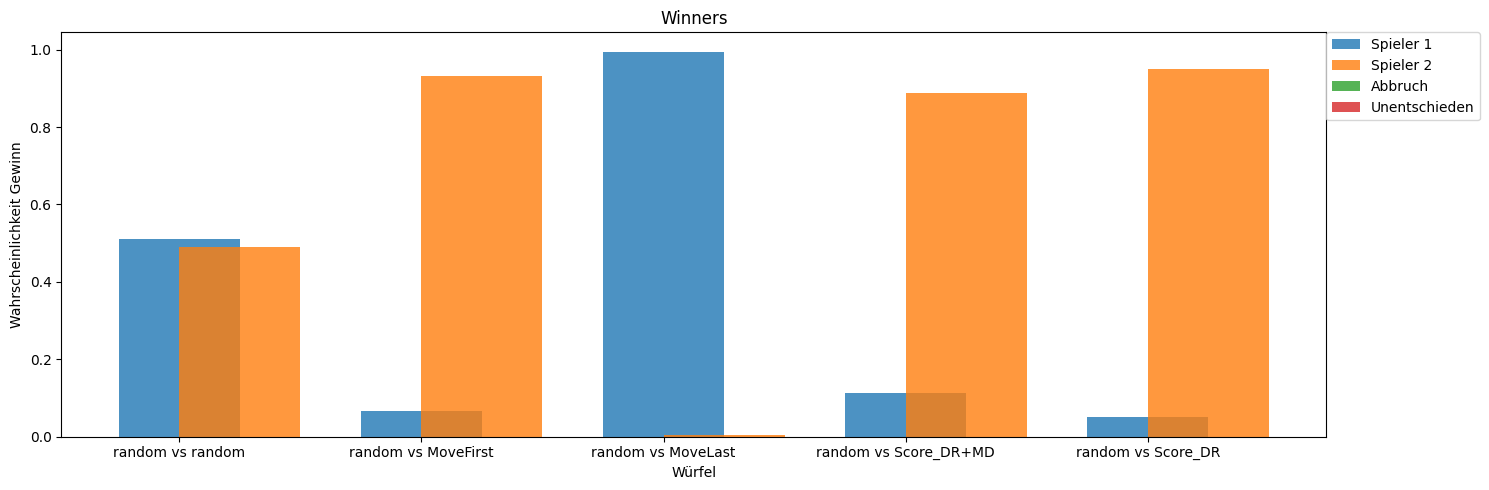

In [45]:
# xlabels = ['No Influence', 'fight', 'fight incl. double']
# xlabels = ["MultiD2Dice(4)",
# "MultiD2Dice(3)",
# "MultiD2DiceNo0(3)",
# "D4()"]
# xlabels=["MF vs MF","S vs MF","S vs S"]
player0 = [s.count(["p0"])/len(s) for s in winners]
player1 = [s.count(["p1"])/len(s) for s in winners]
no_one = [s.count([])/len(s) for s in winners]
both = [s.count(["p0", "p1"])/len(s) for s in winners]

fig, ax = plt.subplots(figsize=[15,5])
# hat_graph(ax, xlabels, [player0, player1], ['Player 0', 'Player 1'])

ax.bar(labels,player0,label="Spieler 1", alpha=.8,width=.5)
ax.bar(labels,player1,label="Spieler 2", alpha=.8,width=.5,align="edge")
ax.bar(labels,no_one,label="Abbruch", alpha=.8,width=.5,align="edge")
ax.bar(labels, both, label="Unentschieden", alpha=.8, width=.5, align="edge")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Würfel')
ax.set_ylabel('Wahrscheinlichkeit Gewinn')
ax.set_title('Winners')
ax.legend( bbox_to_anchor=(1, 1),
          loc='upper left', borderaxespad=0.)

fig.tight_layout()
plt.show()


In [ ]:
[*[10]*10]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]